In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Ground Truth : 3')

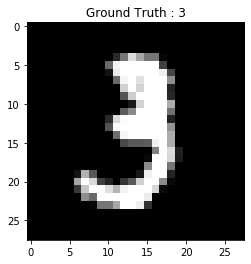

In [2]:
(train_image,train_label),(test_image, test_label) = mnist.load_data()
#display the first image in the training data
print(train_image.shape)
print(train_label.shape)
plt.imshow(train_image[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_label[10]))
# plt.show()

In [3]:
dimData = np.prod(train_image.shape[1:])
train_data = train_image.reshape(train_image.shape[0],dimData)
test_data = test_image.reshape(test_image.shape[0],dimData)

In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [5]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_label_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_label_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 4s 18ms/step - loss: 4.5633 - accuracy: 0.8829 - val_loss: 0.6065 - val_accuracy: 0.9356
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4000 - accuracy: 0.9454 - val_loss: 0.4214 - val_accuracy: 0.9416
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2389 - accuracy: 0.9580 - val_loss: 0.2771 - val_accuracy: 0.9584
Epoch 4/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1901 - accuracy: 0.9664 - val_loss: 0.2556 - val_accuracy: 0.9548
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1640 - accuracy: 0.9725 - val_loss: 0.2870 - val_accuracy: 0.9637
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1489 - accuracy: 0.9760 - val_loss: 0.4190 - val_accuracy: 0.9417
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1394 - accuracy: 0.9781 - val_loss: 0.3411 - val_accuracy: 0.9673